In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.onnx

from sklearn.model_selection import train_test_split
from src.NvidiaCnn import NvidiaCnn
from src.WesternAustraliaCnn import NvidiaCnnByWesternAustralia
from src.Cnn import CNN
from src.Cnn_2 import CNN_2
from src.train import run_training
from src.data import get_images_annotations, RobotDataset

### Load & preprocess the data

In [2]:
DATA_PATH = "./dataset"
images_annotations = get_images_annotations(DATA_PATH)

In [3]:
train_dataset, val_dataset = train_test_split(images_annotations, test_size=0.2, random_state=42)
train_data = RobotDataset(train_dataset, augment=True)
val_data = RobotDataset(val_dataset, augment=False)

In [4]:
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

### NVIDIA CNN

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [18]:
model = NvidiaCnn()
optimizer = optim.Adam(model.parameters(), lr=10e-5)
criterion = nn.MSELoss()
epochs = 100

In [19]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

Running training for 100 epochs.


Epoch 0: 100%|██████████| 190/190 [00:26<00:00,  7.12it/s, loss=0.325] 


Validation loss=0.10468943630118104


Epoch 1: 100%|██████████| 190/190 [00:25<00:00,  7.33it/s, loss=0.0894]


Validation loss=0.13310542398142342


Epoch 2: 100%|██████████| 190/190 [00:26<00:00,  7.12it/s, loss=0.165] 


Validation loss=0.18926623812516347


Epoch 3: 100%|██████████| 190/190 [00:25<00:00,  7.39it/s, loss=0.135] 


Validation loss=0.18488466611955548


Epoch 4: 100%|██████████| 190/190 [00:25<00:00,  7.34it/s, loss=0.0975]


Validation loss=0.181758155797281


Epoch 5: 100%|██████████| 190/190 [00:26<00:00,  7.25it/s, loss=0.102] 


Validation loss=0.05370253171250953


Epoch 6: 100%|██████████| 190/190 [00:25<00:00,  7.37it/s, loss=0.178] 


Validation loss=0.12639605182874425


Epoch 7: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.0836]


Validation loss=0.1067167507120026


Epoch 8: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.0501]


Validation loss=0.040631001369530094


Epoch 9: 100%|██████████| 190/190 [00:26<00:00,  7.07it/s, loss=0.147] 


Validation loss=0.09786510860381557


Epoch 10: 100%|██████████| 190/190 [00:26<00:00,  7.31it/s, loss=0.0827]


Validation loss=0.1910679385579381


Epoch 11: 100%|██████████| 190/190 [00:25<00:00,  7.34it/s, loss=0.108] 


Validation loss=0.1170610054048993


Epoch 12: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.066] 


Validation loss=0.033809615915799576


Epoch 13: 100%|██████████| 190/190 [00:26<00:00,  7.26it/s, loss=0.0627]


Validation loss=0.043113783607989585


Epoch 14: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.0648]


Validation loss=0.07534654382386805


Epoch 15: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0204]


Validation loss=0.06708170140150041


Epoch 16: 100%|██████████| 190/190 [00:26<00:00,  7.11it/s, loss=0.0878]


Validation loss=0.10781584777035638


Epoch 17: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.0737]


Validation loss=0.10443101616568436


Epoch 18: 100%|██████████| 190/190 [00:26<00:00,  7.11it/s, loss=0.0438]


Validation loss=0.11290461077495738


Epoch 19: 100%|██████████| 190/190 [00:26<00:00,  7.29it/s, loss=0.0362]


Validation loss=0.07487332236070958


Epoch 20: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.0516]


Validation loss=0.048260567536449195


Epoch 21: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.0513]


Validation loss=0.08180280278890098


Epoch 22: 100%|██████████| 190/190 [00:26<00:00,  7.29it/s, loss=0.0561]


Validation loss=0.03638533786600031


Epoch 23: 100%|██████████| 190/190 [00:26<00:00,  7.16it/s, loss=0.0513]


Validation loss=0.0715118731272783


Epoch 24: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.0374]


Validation loss=0.17213389931911802


Epoch 25: 100%|██████████| 190/190 [00:26<00:00,  7.16it/s, loss=0.0408]


Validation loss=0.08934037214796964


Epoch 26: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.0456]


Validation loss=0.056097887179832585


Epoch 27: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.0327]


Validation loss=0.18625556799331897


Epoch 28: 100%|██████████| 190/190 [00:26<00:00,  7.21it/s, loss=0.0328]


Validation loss=0.17761018203406928


Epoch 29: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.032] 


Validation loss=0.21497990360726488


Epoch 30: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.043] 


Validation loss=0.14247245163974842


Epoch 31: 100%|██████████| 190/190 [00:25<00:00,  7.38it/s, loss=0.0529]


Validation loss=0.10080059082906737


Epoch 32: 100%|██████████| 190/190 [00:26<00:00,  7.13it/s, loss=0.0367]


Validation loss=0.096449272594271


Epoch 33: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0277]


Validation loss=0.06344497663013426


Epoch 34: 100%|██████████| 190/190 [00:26<00:00,  7.26it/s, loss=0.0779]


Validation loss=0.07788744862667552


Epoch 35: 100%|██████████| 190/190 [00:25<00:00,  7.31it/s, loss=0.0489]


Validation loss=0.19961090976075077


Epoch 36: 100%|██████████| 190/190 [00:25<00:00,  7.33it/s, loss=0.0595]


Validation loss=0.078435710073917


Epoch 37: 100%|██████████| 190/190 [00:26<00:00,  7.24it/s, loss=0.039] 


Validation loss=0.10127724959338578


Epoch 38: 100%|██████████| 190/190 [00:26<00:00,  7.31it/s, loss=0.0417]


Validation loss=0.06262339076516586


Epoch 39: 100%|██████████| 190/190 [00:26<00:00,  7.08it/s, loss=0.0247]


Validation loss=0.05949676948698142


Epoch 40: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0486]


Validation loss=0.14682532812945223


Epoch 41: 100%|██████████| 190/190 [00:26<00:00,  7.09it/s, loss=0.0257]


Validation loss=0.08558793634932722


Epoch 42: 100%|██████████| 190/190 [00:26<00:00,  7.23it/s, loss=0.0703]


Validation loss=0.3446125373811915


Epoch 43: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0314]


Validation loss=0.061434137867980354


Epoch 44: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.0502]


Validation loss=0.10057884853461323


Epoch 45: 100%|██████████| 190/190 [00:25<00:00,  7.33it/s, loss=0.025] 


Validation loss=0.09859078618619052


Epoch 46: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.0413]


Validation loss=0.1333374667487234


Epoch 47: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.0215]


Validation loss=0.07924430336768246


Epoch 48: 100%|██████████| 190/190 [00:26<00:00,  7.08it/s, loss=0.0233]


Validation loss=0.0736875044883657


Epoch 49: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.0171]


Validation loss=0.037556584362955024


Epoch 50: 100%|██████████| 190/190 [00:26<00:00,  7.29it/s, loss=0.0257]


Validation loss=0.06068976713290957


Epoch 51: 100%|██████████| 190/190 [00:26<00:00,  7.26it/s, loss=0.0363]


Validation loss=0.09120630356897286


Epoch 52: 100%|██████████| 190/190 [00:25<00:00,  7.31it/s, loss=0.0286]


Validation loss=0.09778865008967945


Epoch 53: 100%|██████████| 190/190 [00:26<00:00,  7.18it/s, loss=0.0274]


Validation loss=0.02874037837401429


Epoch 54: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0444]


Validation loss=0.06066170638537376


Epoch 55: 100%|██████████| 190/190 [00:26<00:00,  7.11it/s, loss=0.0471]


Validation loss=0.09700240288360848


Epoch 56: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0858]


Validation loss=0.10525903723672643


Epoch 57: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0213]


Validation loss=0.09994697013892694


Epoch 58: 100%|██████████| 190/190 [00:26<00:00,  7.22it/s, loss=0.0273]


Validation loss=0.08936717856928167


Epoch 59: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0184]


Validation loss=0.13689182136329725


Epoch 60: 100%|██████████| 190/190 [00:26<00:00,  7.22it/s, loss=0.0303]


Validation loss=0.18720994159268114


Epoch 61: 100%|██████████| 190/190 [00:26<00:00,  7.28it/s, loss=0.0487]


Validation loss=0.0853269960645742


Epoch 62: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.102] 


Validation loss=0.12338754224057309


Epoch 63: 100%|██████████| 190/190 [00:25<00:00,  7.34it/s, loss=0.0284]


Validation loss=0.06834257493418162


Epoch 64: 100%|██████████| 190/190 [00:26<00:00,  7.06it/s, loss=0.0899]


Validation loss=0.16641719616732903


Epoch 65: 100%|██████████| 190/190 [00:25<00:00,  7.33it/s, loss=0.0265]


Validation loss=0.06032692537941284


Epoch 66: 100%|██████████| 190/190 [00:26<00:00,  7.25it/s, loss=0.0638]


Validation loss=0.06792528021133197


Epoch 67: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.0242]


Validation loss=0.16004225092994753


Epoch 68: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0902] 


Validation loss=0.1066185799245433


Epoch 69: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.0119] 


Validation loss=0.050464304473876946


Epoch 70: 100%|██████████| 190/190 [00:25<00:00,  7.34it/s, loss=0.0422] 


Validation loss=0.050492464109322836


Epoch 71: 100%|██████████| 190/190 [00:26<00:00,  7.15it/s, loss=0.014] 


Validation loss=0.09903394090699201


Epoch 72: 100%|██████████| 190/190 [00:25<00:00,  7.35it/s, loss=0.0356]


Validation loss=0.058221200533807894


Epoch 73: 100%|██████████| 190/190 [00:26<00:00,  7.14it/s, loss=0.0274] 


Validation loss=0.13320197488055777


Epoch 74: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.0248]


Validation loss=0.06288631998639664


Epoch 75: 100%|██████████| 190/190 [00:25<00:00,  7.31it/s, loss=0.0192]


Validation loss=0.08881084970143731


Epoch 76: 100%|██████████| 190/190 [00:26<00:00,  7.17it/s, loss=0.0103] 


Validation loss=0.030346386419647844


Epoch 77: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0514] 


Validation loss=0.013476919992600464


Epoch 78: 100%|██████████| 190/190 [00:26<00:00,  7.12it/s, loss=0.0186] 


Validation loss=0.07094084569455586


Epoch 79: 100%|██████████| 190/190 [00:25<00:00,  7.31it/s, loss=0.0277]


Validation loss=0.027977637828291445


Epoch 80: 100%|██████████| 190/190 [00:26<00:00,  7.07it/s, loss=0.0202]


Validation loss=0.12739889520706077


Epoch 81: 100%|██████████| 190/190 [00:25<00:00,  7.31it/s, loss=0.00986]


Validation loss=0.1115846833792476


Epoch 82: 100%|██████████| 190/190 [00:26<00:00,  7.09it/s, loss=0.0119] 


Validation loss=0.03494130147035357


Epoch 83: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0365] 


Validation loss=0.05981803560634144


Epoch 84: 100%|██████████| 190/190 [00:25<00:00,  7.36it/s, loss=0.0431]


Validation loss=0.053679118620882704


Epoch 85: 100%|██████████| 190/190 [00:26<00:00,  7.23it/s, loss=0.0172] 


Validation loss=0.14397002074067372


Epoch 86: 100%|██████████| 190/190 [00:25<00:00,  7.35it/s, loss=0.00744]


Validation loss=0.1621137913714934


Epoch 87: 100%|██████████| 190/190 [00:26<00:00,  7.14it/s, loss=0.0377] 


Validation loss=0.060285548693328014


Epoch 88: 100%|██████████| 190/190 [00:26<00:00,  7.29it/s, loss=0.0344] 


Validation loss=0.02069363726052618


Epoch 89: 100%|██████████| 190/190 [00:26<00:00,  7.10it/s, loss=0.0204]


Validation loss=0.042361647026943144


Epoch 90: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.0379] 


Validation loss=0.09156000892003702


Epoch 91: 100%|██████████| 190/190 [00:26<00:00,  7.11it/s, loss=0.0358] 


Validation loss=0.08445295804237407


Epoch 92: 100%|██████████| 190/190 [00:26<00:00,  7.27it/s, loss=0.0203]


Validation loss=0.13355041441528928


Epoch 93: 100%|██████████| 190/190 [00:25<00:00,  7.32it/s, loss=0.0206] 


Validation loss=0.04194672541769615


Epoch 94: 100%|██████████| 190/190 [00:26<00:00,  7.21it/s, loss=0.0146] 


Validation loss=0.0901700730877688


Epoch 95: 100%|██████████| 190/190 [00:26<00:00,  7.30it/s, loss=0.0459] 


Validation loss=0.043852033636306256


Epoch 96: 100%|██████████| 190/190 [00:26<00:00,  7.19it/s, loss=0.0245]


Validation loss=0.14305136931500245


Epoch 97: 100%|██████████| 190/190 [00:25<00:00,  7.39it/s, loss=0.0258] 


Validation loss=0.06512841216407392


Epoch 98: 100%|██████████| 190/190 [00:26<00:00,  7.10it/s, loss=0.0182] 


Validation loss=0.09895297503711589


Epoch 99: 100%|██████████| 190/190 [00:26<00:00,  7.26it/s, loss=0.0154] 


Validation loss=0.05808875885352523


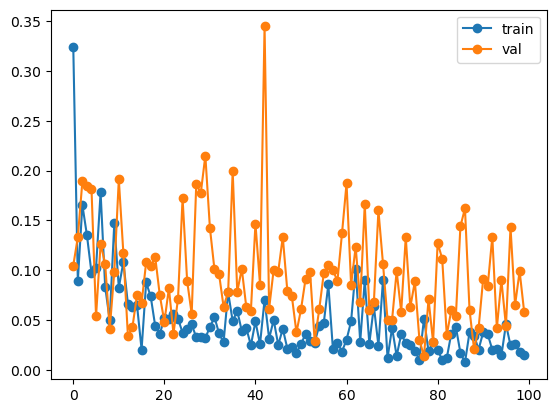

In [20]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

### Export to onnx

In [21]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model_100_.onnx",
                  export_params=True,
                  opset_version=11)

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



### Train Model #2

In [ ]:
model = NvidiaCnnByWesternAustralia()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

### Train Model #3

In [ ]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 100

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model_cnn_1.onnx",
                  export_params=True,
                  opset_version=11)

### Train Model #4

In [ ]:
model = CNN_2()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 100

In [ ]:
train_history, val_history = run_training(model, train_loader, val_loader, optimizer, criterion, epochs, device)

In [ ]:
plt.plot(np.arange(epochs), train_history, marker="o")
plt.plot(np.arange(epochs), val_history, marker="o")
plt.legend(["train", "val"])
plt.show()

In [ ]:
x = torch.randn(1, 3, 224, 224, requires_grad=True).to(device)

torch.onnx.export(model,
                  x,
                  "model_cnn_2_.onnx",
                  export_params=True,
                  opset_version=11)